**Работа выполнена студенткой группы БЭК181 Кордзахия Натела**

In [1]:
import numpy as np
import numpy.random
import pandas as pd
# Модули для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import seaborn as sns
import plotly
import plotly.express as px
import scipy.stats as sts
plt.style.use('ggplot')
%matplotlib inline

# Парадокс инспектора.
Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интерва- лы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам. Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут ближайшим автобусом.

Проведите 104 экспериментов и с их помощью:

а) [10]Постройтегистограммуколичестваавтобусов,отошедшихотавтостанциизасутки.Похожели визуально распределение на нормальное?

б) [10]ИнспекторТимонвыбираетравновероятноодинизвсехавтобусовотошедшихотавтостан- ции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математи- ческое ожидание и дисперсию этого числа.

в) [10] Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пасса- жиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

г) [10]Какизменятсяответынаэтивопросы,есливремямеждуавтобусамибудетэкспоненциаль- но со средним в 10 минут?

Пояснения: первый автобус можно не включать в выборку, Пумбу за пассажира можно не считать.

# Тут начинается решение

Начнем рассуждать.


Непонятно, что происходит в самом начале и конце дня - а именно как рассматривать краевые точки, включать их или нет. Но так как выборка достаточно большая, эти значения критическим обрахом не повлияют на результат, поэтому в решении нет акцента на этот факт.

Примем за факт то, что в 12 часах 720 минут, и если мы будем представлять суммарное количество минут, которое может ехать автобус, то он не должно привышаать 720, так что введем ограничение на кум сумму. 

Какие функции будут использоваться?

**Функция а** - генерация рандома из двух чисел 5 и 10, вероятность выпадения каждого - 1/2

**Функция b** - генерация рандома из экспоненциального распределения

**Функция c** - генерация рандома из двух чисел 5 и 10, вероятность выпадения 5 равна 1/3, 10 - 2/3. Это будет независимый случай, так как попасть в интервал десять больше, чем в интервал 5, в два раза.

In [2]:
a = np.random.choice([5, 10], size = 10**4) 
b = np.random.exponential(10, size = 10**4)
c = np.random.choice([5, 10], p = [1/3, 2/3], size = 10**4) 

Экспоненциальное распределение имет свойство давать дробные значения, поэтому во избежании 61 секунды и 2,5 человек я решила все сделать целым

In [3]:
g = list(b)
j = []
for i in range(len(g)):
    j.append((round(g[i])))

Необходимо сгенерить ряд значений и определить его длину. Верным будет то, что для функции np.random.choice, которая используется в при
первых симуляциях, максимально возможное количество аавтобусов за день не прерышает 144, для np.random.exponential тоже примерно так, 
но поставим ограничениев размере 150, так как ненужное все равно уйдет при проверке кум. суммы



In [4]:
# все вариации первого пункта 
def bin_day():
    a = np.random.choice([5, 10], size = 144) 
    vr = np.cumsum(a)
    v = np.delete(vr, np.where(vr > 721))
    return len(v)

def exp_day():
    b = np.random.exponential(10, size = 144)
    vr = np.cumsum(b)
    v = np.delete(vr, np.where(vr > 721))
    return len(v)

def simulation1():
    ans = []
    for i in range(10**4):
        day = bin_day()
        ans.append(day)
    return ans 

def simulation2():
    ans = []
    for i in range(10**4):
        day = exp_day()
        ans.append(day)
    return ans 

# симуляция для последнего пунка - создаем лист значений из экспоненциального рандома 
# и случайным образом выбираем значение
def simulation3():
    for i in range(10**4):
        z = np.random.choice(j, p = b/b.sum(), size = 10**4) 
    return z

**Пункт А**

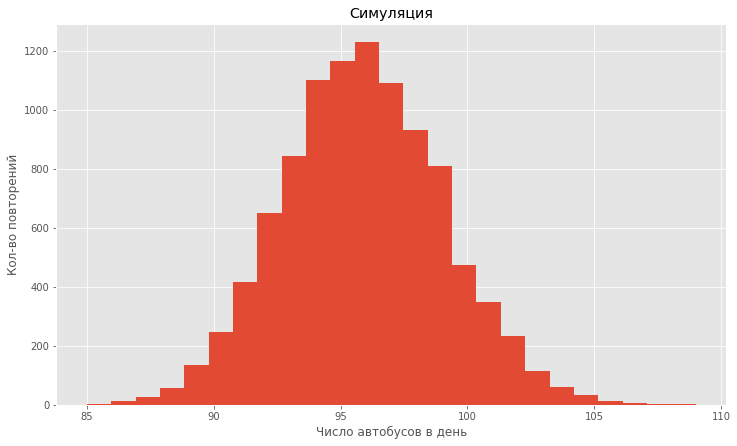

In [5]:
np.random.seed(10**4)
plt.figure(figsize=(12, 7))
plt.hist(simulation1(), bins=25)
plt.xlabel('Число автобусов в день')
plt.ylabel('Кол-во повторений')
plt.title('Симуляция')

plt.show();

Ну ничего не скажешь, похоже, ой как похоже на нормальное распределение

**Пункт B**

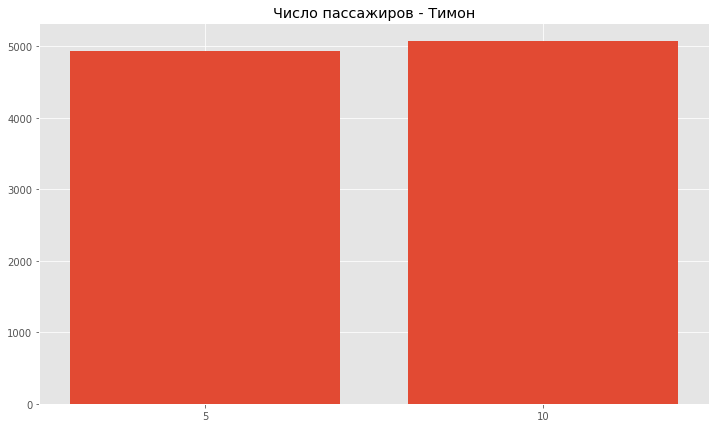

Кол-во 5: 4931 , кол-во 10: 5069
Мат. ожидание:  7.5345
Дисперсия:  6.249434693468313


In [6]:
np.random.seed(10**4)
df = pd.DataFrame({'Sim': a})
x = [sum(df['Sim'] == 5), sum(df['Sim'] == 10)]
labels = ['5', '10']
plt.figure(figsize=(12, 7))
plt.bar([1,2], x)
plt.xticks([1,2], labels)
plt.title('Число пассажиров - Тимон')
plt.show()

print('Кол-во 5:', sum(df['Sim'] == 5), ', кол-во 10:', sum(df['Sim'] == 10))
print('Мат. ожидание: ', df['Sim'].mean())
print('Дисперсия: ', df['Sim'].var())

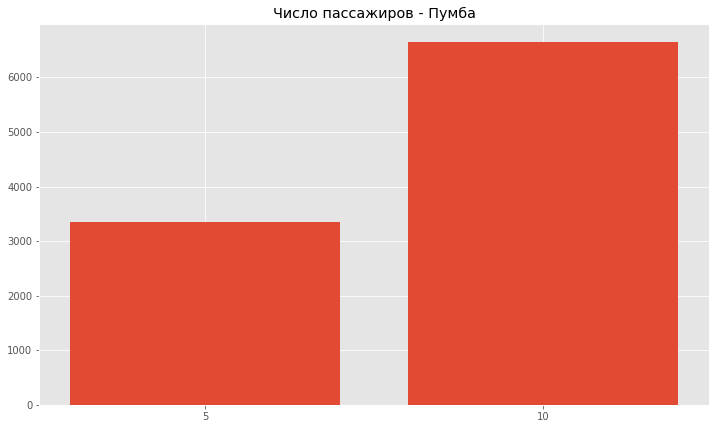

Кол-во 5: 3357 , кол-во 10: 6643
Мат. ожидание:  8.3215
Дисперсия:  5.575695319532878


In [7]:
np.random.seed(10**4)
df = pd.DataFrame({'Sim': c})
x = [sum(df['Sim'] == 5), sum(df['Sim'] == 10)]
labels = ['5', '10']
plt.figure(figsize=(12, 7))
plt.bar([1,2], x)
plt.xticks([1,2], labels)
plt.title('Число пассажиров - Пумба')
plt.show()

print('Кол-во 5:', sum(df['Sim'] == 5), ', кол-во 10:', sum(df['Sim'] == 10))
print('Мат. ожидание: ', df['Sim'].mean())
print('Дисперсия: ', df['Sim'].var())

Как и ожидалось, если автобусы приходят равновероятно, то среднее время ожидания можно высчитать как $Е(х) = 5 * 0.5 + 10 * 0.5 = 7.5$, в то же время при случайном выборе шанс попасть в перерыв 10 минут больше, а мат. ожижания можо посчитать так: $Е(х) = 5 * (1/3) + 10 * (2/3) \approx 8.3$

**Пункт C**

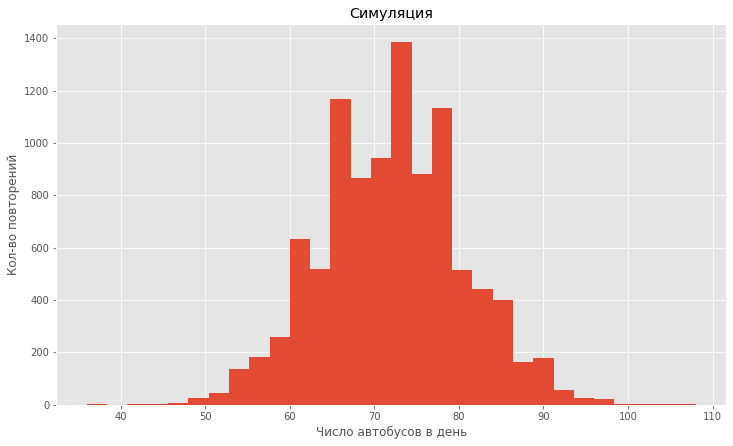

In [8]:
np.random.seed(10**4)
plt.figure(figsize=(12, 7))
plt.hist(simulation2(), bins=30)
plt.xlabel('Число автобусов в день')
plt.ylabel('Кол-во повторений')
plt.title('Симуляция')

plt.show();

Легкие отголоски нормального распределения

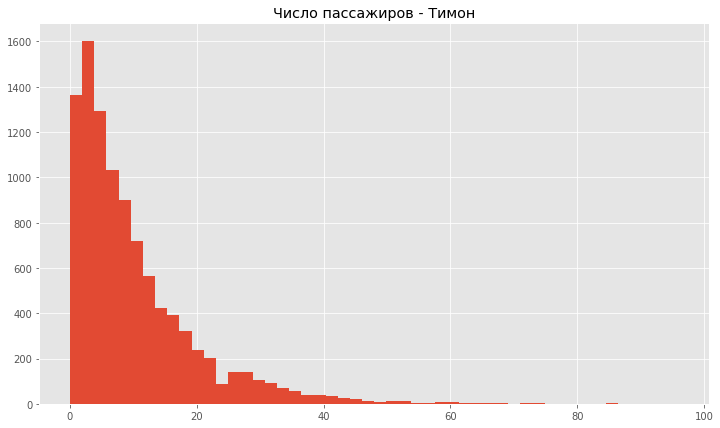

Мат. ожидание:  9.954
Дисперсия:  100.63734773477209


In [9]:
df = pd.DataFrame({'Sim': j})

plt.figure(figsize=(12, 7))
plt.hist(df['Sim'], bins = 50)

plt.title('Число пассажиров - Тимон')
plt.show()

print('Мат. ожидание: ', df['Sim'].mean())
print('Дисперсия: ', df['Sim'].var())

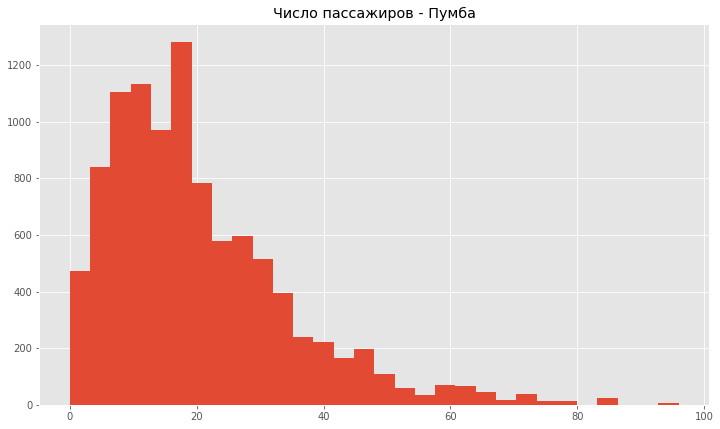

Мат. ожидание:  20.1602
Дисперсия:  205.15805176517532


In [10]:
df = pd.DataFrame({'Sim': simulation3()})
plt.figure(figsize=(12, 7))
plt.hist(df['Sim'], bins = 30)

plt.title('Число пассажиров - Пумба')
plt.show()

print('Мат. ожидание: ', df['Sim'].mean())
print('Дисперсия: ', df['Sim'].var())

Симуляция Тимона дала ожидаемый результат - экспонинциальное распределение с мат. ожиданием ≈10 и дисперсией ≈100. Симуляуия Пумбы привела к интересным результатам, и я бы сказала, что это похоже на распределение Пуассона

# Парадокс Хуана Мануэля Родригеса Паррондо. 

У Атоса, Портоса и Арамиса по 1000 франков.

Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью 0.49 и проигрывает один франк с вероятностью 0.51.

Портос ходит в казино Б, где ситуация интереснее :) Если богатство посетителя кратно трём, то по- сетитель выигрывает франк с вероятностью 0.09 и проигрывает один франк с вероятностью 0.91. Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью 0.74 и проигрывает один франк с вероятностью 0.26.

Арамис каждый раз выбирает казино А или казино Б равновероятно.

Проведите 104 симуляций эволюции благосостояния Атоса, Портоса и Арамиса. Каждая симуляция предусматривает 1000 посещений казино. Все три игрока все деньги носят с собой и ни на что не тратят :)

а) [10] Постройте на графике 10 случайных траекторий изменений богатства Атоса, по горизонтали номер посещения казино, по вертикали —богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

б) [10] Постройте на графике 10 случайных траекторий изменений богатства Портоса, по горизонтали номер посещени казино, по вертикали —богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.

в) [10] Постройте на графике 10 случайных траекторий изменений богатства Арамиса, по горизонтали номер посещени казино, по вертикали —богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.


In [281]:
np.random.seed(10000)

In [ ]:
x = np.random.choice([-1, 1], p = [0.51, 0.49], size = (10**4, 10))
vr = np.cumsum(x, axis = 0) + 1000

In [391]:
df = pd.DataFrame(np.cumsum(np.random.choice(a=[-1, 1], p=[0.51, 0.49], size=(10**3, 10)), axis=0)+1000)
df['костыль'] = range(1000)
df = df.melt(id_vars='костыль')
df

,костыль,variable,value
0,0,0,999
1,1,0,998
2,2,0,997
3,3,0,996
4,4,0,995
...,...,...,...
9995,995,9,960
9996,996,9,959
9997,997,9,960
9998,998,9,961


In [368]:
def Atos():
    x = np.random.choice([-1, 1], p = [0.51, 0.49], size = (10**4, 10))
    vr = np.cumsum(x, axis = 0) + 1000
    return vr

In [389]:
Atos()

array([[ 999, 1001, 1001, ..., 1001,  999,  999],
       [ 998, 1002, 1002, ..., 1002, 1000,  998],
       [ 997, 1001, 1003, ..., 1003, 1001,  999],
       ...,
       [ 772,  750,  736, ...,  766,  944,  666],
       [ 773,  751,  737, ...,  767,  943,  667],
       [ 774,  750,  738, ...,  768,  944,  666]])

In [ ]:
def graph(mush):
    df = pd.DataFrame(mush)
    df['Графики'] = range(1, 10001)
    

In [394]:
df = pd.DataFrame(Atos())
df['Графики'] = range(1, 10001)
a = df.iloc[-1]
b = list(a)


In [393]:
df = pd.DataFrame(Atos())
df['Графики'] = range(1, 10001)
a = df.iloc[-1]


In [ ]:
np.random.seed(1)
plt.figure(figsize=(12,6))

df = pd.DataFrame(np.cumsum(np.random.choice(a=[-1, 1], p=[0.51, 0.49], size=(10**3, 10)), axis=0)+1000)
df['костыль'] = range(1000)
df = df.melt(id_vars='костыль')
sns.lineplot(data=df, x='костыль', y='value', hue='variable')
plt.xlabel('Число посещений казино')
plt.ylabel('Средний выигрыш')
plt.title('Атос') 


df = pd.DataFrame(np.cumsum(np.random.choice(a=[-1, 1], p=[0.51, 0.49], size=(10**3, 10**4)), axis=0)+1000)
df['в среднем'] = np.mean(df, axis = 1)
df['в среднем'].plot(linewidth=3, color = 'c')


In [308]:
df = pd.DataFrame(np.cumsum(np.random.choice(a=[-1, 1], p=[0.51, 0.49], size=(10**3, 10)), axis=0)+1000)
df['костыль'] = range(1000)
df

,0,1,2,3,4,5,6,7,8,9,костыль
0,1001,1001,999,1001,1001,999,1001,1001,1001,1001,0
1,1002,1002,1000,1002,1002,1000,1000,1002,1002,1002,1
2,1003,1003,999,1003,1001,1001,1001,1001,1001,1003,2
3,1002,1002,998,1002,1002,1002,1002,1000,1000,1004,3
4,1001,1001,999,1001,1001,1003,1003,1001,1001,1003,4
...,...,...,...,...,...,...,...,...,...,...,...
995,984,978,958,1012,954,972,1012,950,976,958,995
996,983,977,957,1013,953,971,1013,949,975,959,996
997,984,978,956,1014,954,970,1012,950,974,960,997
998,985,977,957,1013,955,969,1011,949,973,959,998


# Парадокс Берксона.
Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо аппроксимируются нормальным распределением с ожиданием 60 и стандартным отклонением 10.

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших более n баллов в сумме по русскому и математике.

Для каждого n от 80 до 160 с шагом 5 случайно создайте 10^4 школьников и поделите их на прошед- ших и не прошедших в УШЭ.

а) [10] Постройте график числа прошедших в УШЭ в зависимости от n.

б) [10]Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от n среди прошедших в УШЭ.

в) [10]Постройте график выборочной корреляции между результатами по русскому и математике в зависимости от n среди не прошедших в УШЭ.

In [90]:
np.random.seed(100)
list1 = []
list2 = []
corr_y = []
corr_n = []
for n in range(80, 161, 5):
    rus = np.random.normal(60, 10, size=10**4)
    mat = np.random.normal(60, 10, size=10**4)
    ege = rus + mat
    schet = np.count_nonzero(ege > n)
    list1.append(n)
    list2.append(schet)
    
    balli = np.c_[rus, mat, ege]
    yeah = balli[balli[:,2] > n, :]
    no = balli[balli[:,2] < n, :]
    corr1 = np.corrcoef(yeah[:,0], yeah[:,1])[0, 1]
    corr2 = np.corrcoef(no[:,0], no[:,1])[0, 1]
    corr_y.append(corr1)
    corr_n.append(corr2)

In [98]:
dff = pd.DataFrame({'Балл': list1, 'Кол-во учеников':list2,'Не прошли':corr_n, 'Прошли':corr_y})
dff

,Балл,Кол-во учеников,Не прошли,Прошли
0,80,9985,-0.934279,-0.017823
1,85,9926,-0.815407,-0.019805
2,90,9826,-0.804331,-0.038936
3,95,9643,-0.801445,-0.081463
4,100,9248,-0.746860,-0.127963
5,105,8511,-0.682632,-0.214453
6,110,7622,-0.631650,-0.302136
7,115,6404,-0.560394,-0.381153
8,120,5009,-0.488984,-0.462642
9,125,3619,-0.369023,-0.552123


In [85]:
dff = pd.DataFrame({'Балл': list1, 'Кол-во учеников':list2,'Не прошли':corr_n, 'Прошли':corr_y})
fig = px.bar(dff,
            x = 'Балл', 
            y='Кол-во учеников',
            title= 'Кол-во прошедших в УШЭ в зависимости от n',
            width=700, height=500)
fig.show()

In [87]:
px.line(dff, 
        title='Выб. кор-ция между баллами за экзамены и прошедшеми в УШЭ',
        x='Балл', 
        y='Прошли',
        width=700, height=500)

In [88]:
px.line(dff, 
        title='Выб. кор-ция между баллами за экзамены и непрошедшеми в УШЭ',
        x='Балл', 
        y='Не прошли',
        width=700, height=500)

## Парадокс Штайна

Ниф-Ниф, Наф-Наф и Нуф-Нуф качают пресс на карантине, чтобы приготовиться к встрече Волка :) Количества подъёмов туловища в i-й день у поросят обозначим Xi, Yi и Zi. Эти величины незави- симы и хорошо аппроксимируются нормальным распределением Xi ∼ N (60, 100), Yi ∼ N (70, 100), Zi ∼N(80,100)

Карантин длится 100 дней. Волк не знает математических ожиданий (60, 70, 80), но знает дисперсии. Волку удаётся подсмотреть, сколько раз поросята поднимают свои туловища.
Проведите 10^4 симуляций карантина :)

Без лишных вычислений скажем, что $\mu_{ML} = \bar{X}$, a  $\sigma_{ML} = S^{2}$ для нормального распределения

In [11]:
def rasp(mu):
    r = list(np.mean(np.random.normal(mu, 10, (10**4, 100)), axis=1))
    return r

In [55]:
mu1 = 60
mu2 = 70
mu3 = 80

In [56]:
np.random.seed(100)
dfn = pd.DataFrame({'xi' : rasp(mu1),'yi' : rasp(mu2), 'zi' : rasp(mu3)})

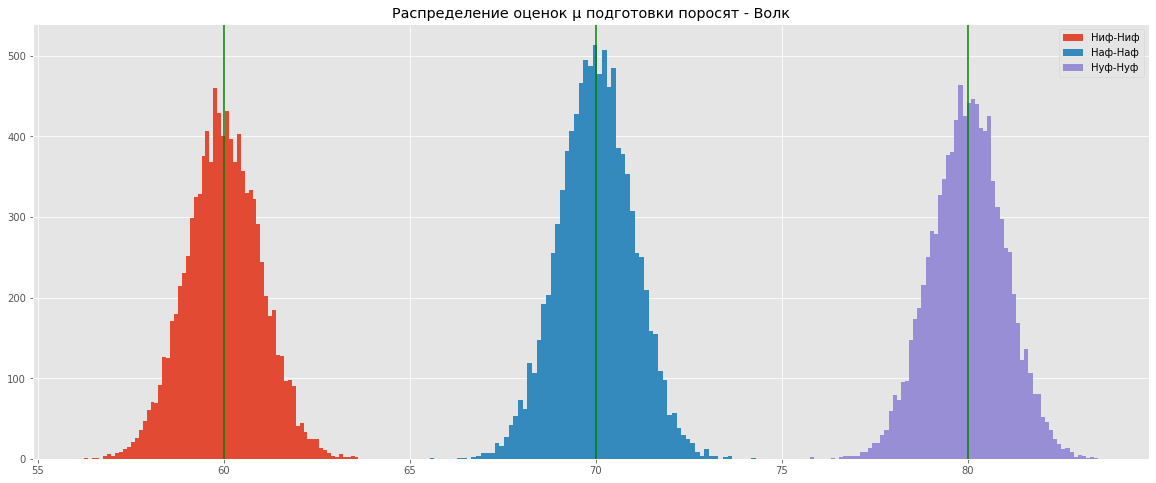

In [75]:
np.random.seed(100)

def theta(mu1, mu2, mu3):
    plt.figure(figsize=(20, 8))
    plt.hist(dfn['xi'], bins = 70, label = 'Ниф-Ниф')
    plt.hist(dfn['yi'], bins = 70, label = 'Наф-Наф')
    plt.hist(dfn['zi'], bins = 70, label = 'Нуф-Нуф')
    plt.axvline(mu1, color='g')
    plt.axvline(mu2, color='g')
    plt.axvline(mu3, color='g')
    plt.title('Распределение оценок μ подготовки поросят - Волк')
    plt.legend()
    pass

theta(mu1, mu2, mu3)

Мат. ожидание ошибки: 2.968091435140072


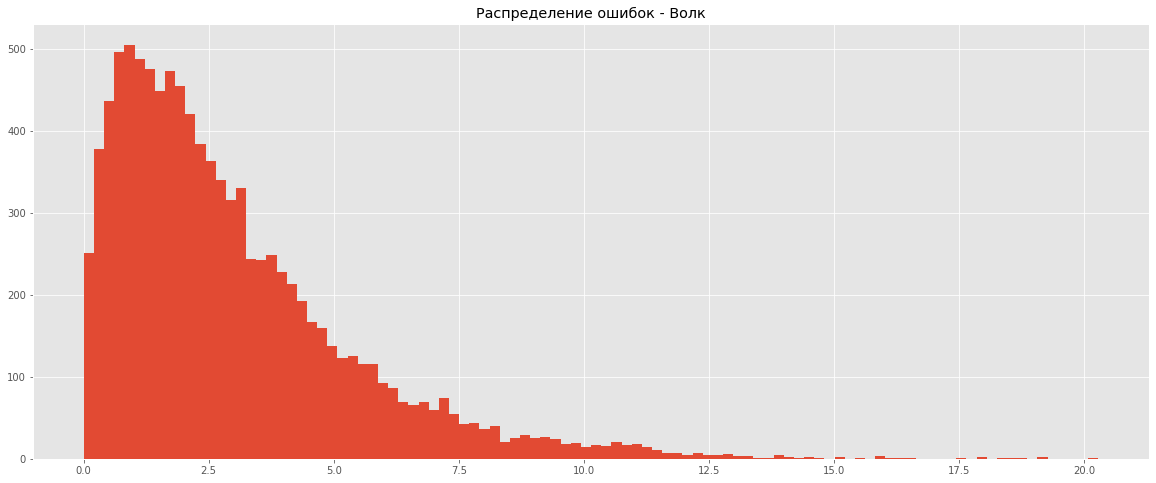

In [81]:
def mistake(mu1, mu2, mu3):
    plt.figure(figsize=(20, 8))
    dfn['mistake'] = (dfn.xi - mu1)**2 + (dfn.yi - mu2)**2 + (dfn.zi - mu3)**2
    plt.hist(dfn['mistake'], bins = 100)
    plt.title('Распределение ошибок - Волк')
    print('Мат. ожидание ошибки:', dfn['mistake'].mean())
    pass

mistake(mu1, mu2, mu3)

Выборочная корреляция оценок:  0.009007630852637049


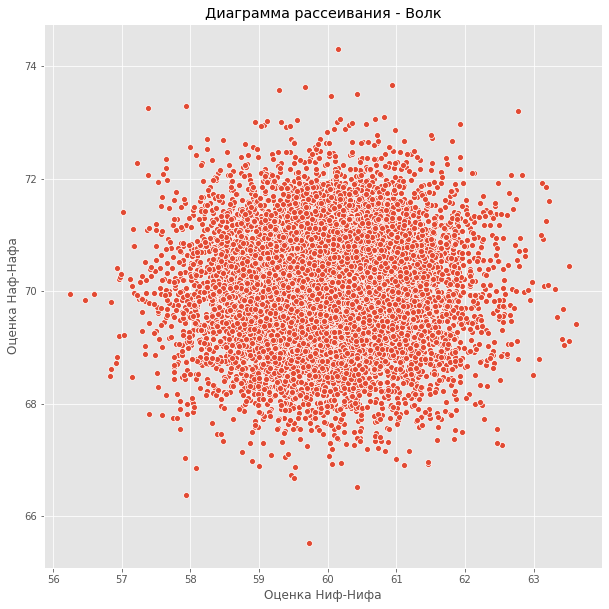

In [82]:
def rass():
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x = dfn.xi, y = dfn.yi)
    print('Выборочная корреляция оценок: ', dfn.xi.corr(dfn.yi))
    plt.title('Диаграмма рассеивания - Волк')
    plt.xlabel('Оценка Ниф-Нифа')
    plt.ylabel('Оценка Наф-Нафа')
    pass

rass()

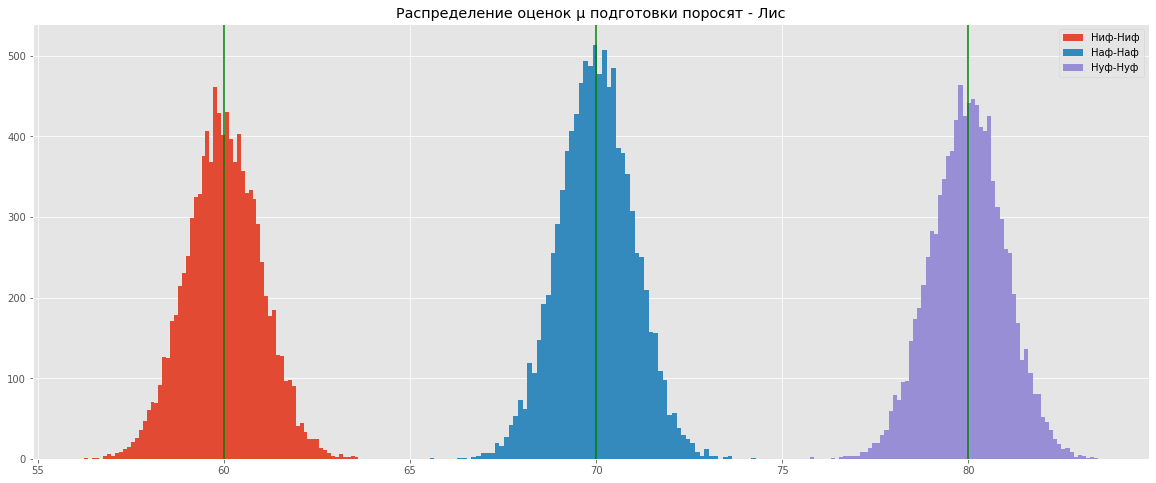

In [79]:
np.random.seed(100)

def theta2(mu1, mu2, mu3):
    dfn['lis'] = 1 - 1/(dfn.xi**2 + dfn.yi**2 + dfn.zi**2)
    dfn['xi_n'] = dfn.xi * dfn.lis
    dfn['yi_n'] = dfn.yi * dfn.lis
    dfn['zi_n'] = dfn.zi * dfn.lis
    plt.figure(figsize=(20, 8))
    plt.hist(dfn['xi_n'], bins = 70, label = 'Ниф-Ниф')
    plt.hist(dfn['yi_n'], bins = 70, label = 'Наф-Наф')
    plt.hist(dfn['zi_n'], bins = 70, label = 'Нуф-Нуф')
    plt.axvline(mu1, color='g')
    plt.axvline(mu2, color='g')
    plt.axvline(mu3, color='g')
    plt.title('Распределение оценок μ подготовки поросят - Лис')
    plt.legend()
    pass

theta2(mu1, mu2, mu3)

Мат. ожидание ошибки: 2.968043969572039


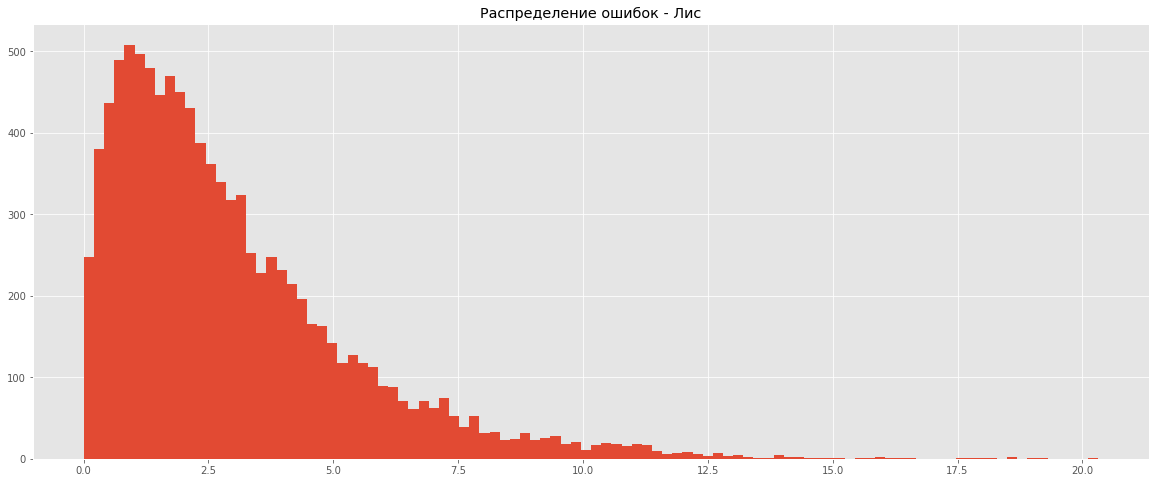

In [72]:
def mistake2(mu1, mu2, mu3):
    plt.figure(figsize=(20, 8))
    dfn['mistake2'] = (dfn.xi_n - mu1)**2 + (dfn.yi_n - mu2)**2 + (dfn.zi_n - mu3)**2
    plt.hist(dfn['mistake2'], bins = 100)
    plt.title('Распределение ошибок - Лис')
    print('Мат. ожидание ошибки:', dfn['mistake2'].mean())
    pass

mistake2(mu1, mu2, mu3)

Выборочная корреляция оценок:  0.009083070308917945


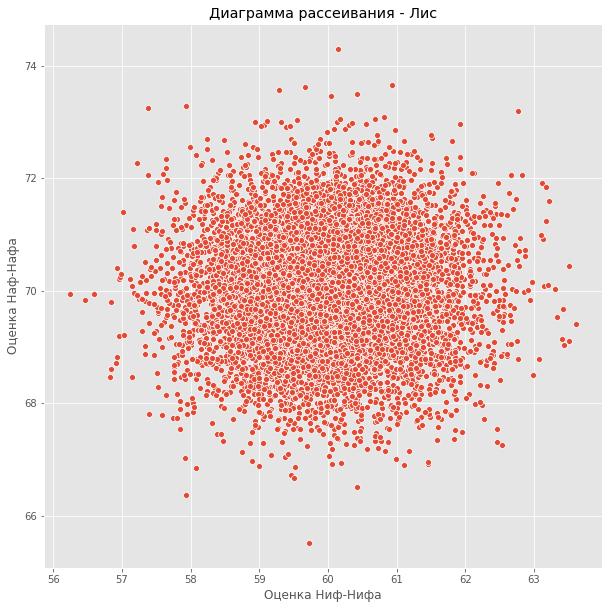

In [80]:
def rass2():
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x = dfn.xi_n, y = dfn.yi_n)
    print('Выборочная корреляция оценок: ', dfn.xi_n.corr(dfn.yi_n))
    plt.title('Диаграмма рассеивания - Лис')
    plt.xlabel('Оценка Ниф-Нифа')
    plt.ylabel('Оценка Наф-Нафа')
    pass

rass2()